In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [101]:
#read the file 
df = pd.read_csv('Gravitytest.csv')
df

,Distance,Time
0,100,0.29
1,100,0.31
2,100,0.25
3,100,0.29
4,100,0.32
5,100,0.35
6,100,0.30
7,110,0.28
8,110,0.38
9,110,0.45


In [103]:
df.head()


,Distance,Time
0,100,0.29
1,100,0.31
2,100,0.25
3,100,0.29
4,100,0.32


In [105]:
df.describe()

,Distance,Time
count,57.000000,57.000000
mean,138.421053,0.432982
std,26.307894,0.086890
min,100.000000,0.250000
25%,120.000000,0.350000
50%,140.000000,0.440000
75%,160.000000,0.500000
max,180.000000,0.600000


In [107]:
#apply the linear regression to the data 
#We'll use the equation s = 0.5*g*t**2 .

#Calculate time squared and convert distance to meters.

df['Distance'] = df['Distance'] /100
df['Time'] = df['Time']**2



In [111]:
df['Time']

0     0.0841
1     0.0961
2     0.0625
3     0.0841
4     0.1024
5     0.1225
6     0.0900
7     0.0784
8     0.1444
9     0.2025
10    0.1024
11    0.1156
12    0.1225
13    0.1225
14    0.1764
15    0.1444
16    0.1089
17    0.0900
18    0.1156
19    0.1521
20    0.1681
21    0.2209
22    0.1681
23    0.1764
24    0.1936
25    0.2209
26    0.1936
27    0.1936
28    0.1936
29    0.1764
30    0.2209
31    0.2209
32    0.2116
33    0.2209
34    0.2500
35    0.2916
36    0.1600
37    0.2401
38    0.1681
39    0.3249
40    0.2601
41    0.2500
42    0.2025
43    0.2601
44    0.2304
45    0.2704
46    0.2601
47    0.3249
48    0.3025
49    0.2209
50    0.2500
51    0.3025
52    0.2601
53    0.3600
54    0.2601
55    0.2601
56    0.3025
Name: Time, dtype: float64

In [113]:
X = df[['Time']]  # Feature
y = df['Distance']   

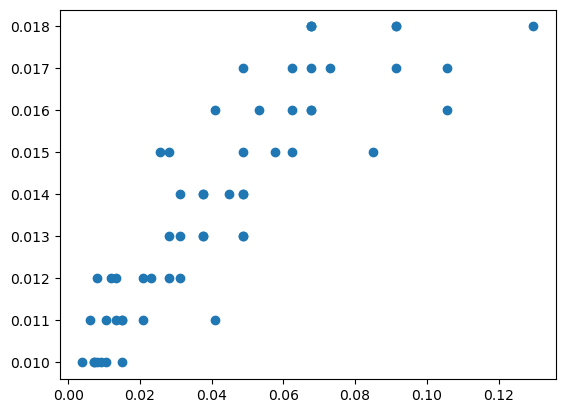

In [85]:
plt.scatter(df['Time'],df['Distance'])

In [115]:
from sklearn.linear_model import LinearRegression 



In [177]:
#train the model 
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [179]:
#making predicitons 
predictions = lr.predict(X)

In [181]:
#Calculate the metrics
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

mean_squared_error = mean_squared_error(y , predictions)
print(f"Mean Squared Error (MSE): {mean_squared_error:.4f}")
rmse = np.sqrt(mean_squared_error)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
mae = mean_absolute_error(y, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
r_squared = lr.score(X, y)
print(f"R-squared: {r_squared:.4f}")

Mean Squared Error (MSE): 0.0139
Root Mean Squared Error (RMSE): 0.1180
Mean Absolute Error (MAE): 0.0947
R-squared: 0.7952


Text(0.5, 1.0, 'Residuals Plot')

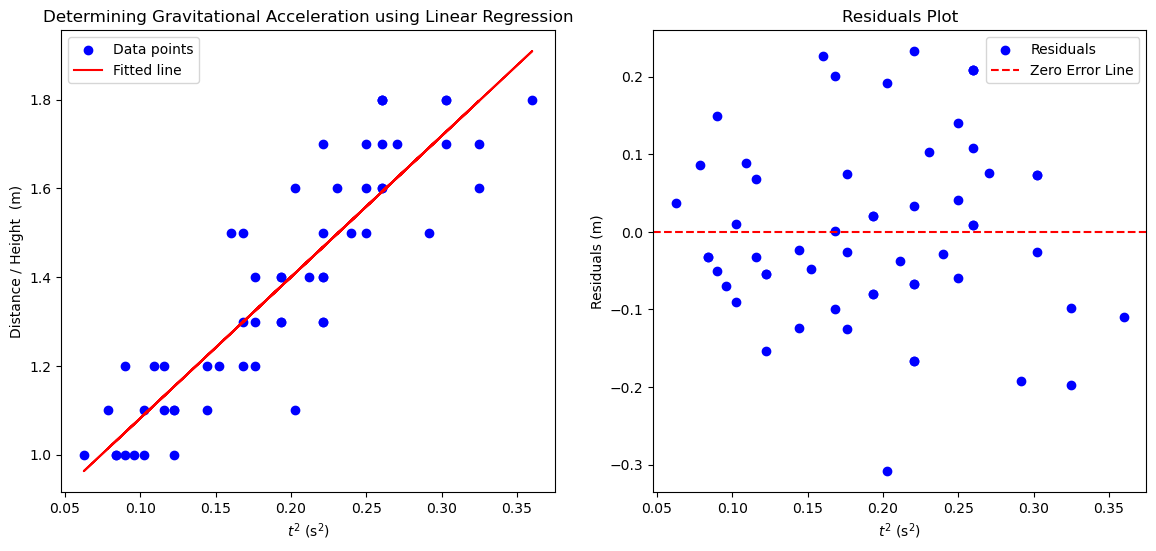

In [183]:
# Plot results
plt.figure(figsize=(14, 6))

# Scatter plot of the data points and fitted line
plt.subplot(1, 2, 1)
plt.scatter(df['Time'], df['Distance'], color='blue', label='Data points')
plt.plot(df['Time'], predictions, color='red', label='Fitted line')
plt.xlabel('$t^2$ (s$^2$)')
plt.ylabel('Distance / Height  (m)')
plt.legend()
plt.title('Determining Gravitational Acceleration using Linear Regression')

# Residuals plot
plt.subplot(1, 2, 2)
plt.scatter(df['Time'], y - predictions, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('$t^2$ (s$^2$)')
plt.ylabel('Residuals (m)')
plt.legend()
plt.title('Residuals Plot')

In [201]:
# New times for which you want to predict heights
new_times_s = np.array([7, 10 , 5 , 12, 25,50])

# Calculate time squared for the new times
new_time_squared = new_times_s**2

# Reshape the data to fit the model input requirements
new_time_squared = new_time_squared.reshape(-1, 1)

# Make predictions using the model
new_predictions = lr.predict(new_time_squared)

# Print the predictions
for time, pred in zip(new_times_s, new_predictions):
    print(f"Predicted height for time {time} seconds (t^2 = {time**2}): {pred:.4f} meters")

Predicted height for time 7 seconds (t^2 = 49): 156.5840 meters
Predicted height for time 10 seconds (t^2 = 100): 318.7636 meters
Predicted height for time 5 seconds (t^2 = 25): 80.2642 meters
Predicted height for time 12 seconds (t^2 = 144): 458.6832 meters
Predicted height for time 25 seconds (t^2 = 625): 1988.2592 meters
Predicted height for time 50 seconds (t^2 = 2500): 7950.7435 meters


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


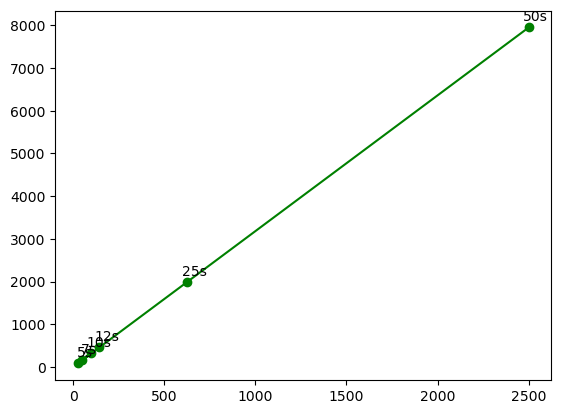

In [223]:

plt.plot(new_time_squared , new_predictions ,color='green', label='New predictions' , marker = 'o')
for i, txt in enumerate(new_times_s):
    plt.annotate(f"{txt}s", (new_time_squared[i], new_predictions[i]), textcoords="offset points", xytext=(5,5), ha='center' )
